U01

Aufgabe 2

Vorwärts Summe:  [1.25       1.42361111 1.52742205 1.58434653 1.61416726 1.6294305
 1.637152   1.64103544 1.64298285 1.64395798]
Rückwährts Summe:  [1.25       1.42361111 1.52742205 1.58434653 1.61416726 1.6294305
 1.637152   1.64103544 1.64298285 1.64395798]


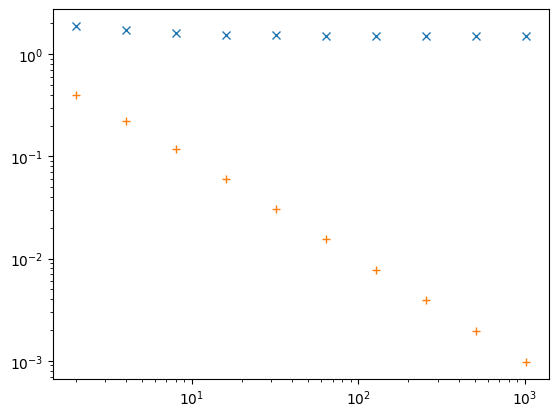

In [3]:
import numpy as np
import matplotlib.pyplot as plt

j_range = np.arange(10) + 1
n_range = 2 ** j_range


def s(n):
    ret = 0
    for k in (np.arange(n) + 1):
        ret += 1 / k ** 2
    return ret


def s_rev(n):
    ret = 0
    for k in (n - np.arange(n)):
        ret += 1 / k ** 2
    return ret


s_vec = np.vectorize(s)
s_rev_vec = np.vectorize(s_rev)

s_ret = s_vec(n_range)
s_rev_ret = s_rev_vec(n_range)

print('Vorwärts Summe: ', s_ret)
print('Rückwährts Summe: ', s_rev_ret)

deviation = abs(s_ret - np.pi)
deviation_rev = abs(s_rev_ret - np.pi ** 2 / 6)

fig, ax = plt.subplots()

ax.loglog(n_range, deviation, 'x')
ax.loglog(n_range, deviation_rev, '+')

# fig.savefig('U01_2.pdf')

Aufgabe 3

a)
def. $g(x)=(x, x^2)$

beh. $x^{(n)}=g(a^nc)$

IA: $x^{(0)}=g(a^0 c)=(c, c^2)$

IS: $x^{(n+1)}=f(x^{(n)})$ mit IV: $x^{(n)}=g(a^nc)$

$\Rightarrow x^{(n+1)}=f(g(a^nc))=(a\cdot a^nc, -(b-a^2) (a^nc)^2 + b (a^nc)^2) $

$= (a^{n+1}c, a^2 (a^nc)^2 + b (a^nc)^2 - b (a^nc)^2) = (a^{n+1}c, (a^{n+1}c)^2) = g(a^{n+1}c)$

Somit gilt mit $x^{(n)}=g(a^nx)$ die Darstellung $x^{(n)}=(a^nc, (a^nc)^2)$

$\lim_{n\rightarrow \inf}||x^{(n)}||_2$ = $\lim_{n\rightarrow \infty}\sqrt{(a^nc)^2 + (a^nc)^4} = \lim_{n\rightarrow \infty}a^nc\sqrt{1 + (a^nc)^2}$

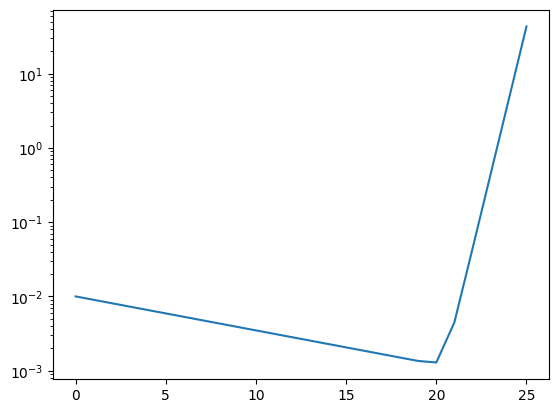

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x1, x2, a: float, b: float):
    ret1 = a * x1
    ret2 = -(b - a ** 2) * x1 ** 2 + b * x2
    return [ret1, ret2]


nrange = np.arange(26)
coor_list = []
c = 1 / 100
x_n = [c, c ** 2]
for _ in nrange:
    coor_list.append(x_n)
    x_n = f(*x_n, a=9 / 10, b=10)

norm_list = np.linalg.norm(coor_list, axis=1)

fig, ax = plt.subplots()

ax.semilogy(nrange, norm_list)

# fig.savefig('U01_3.pdf')